In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data_Kaggle.csv


#  **Imports**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
pd.set_option('display.max_columns', None)

In [70]:
dataset = pd.read_csv('../input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data_Kaggle.csv')

In [71]:
dataset.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

- how does income impact work life balance?
- how does a healthy body/healthy mind/expertise/connection/meaning influence lifestyle?
- which age group has a better work life balance?
- which gender has a better work life balance?
- healthy body: FRUITS_VEGGIES, BMI_RANGE, DAILY_STEPS, SLEEP_HOURS
- healthy mind: DAILY_STRESS, SLEEP_HOURS, DAILY_SHOUTING, WEEKLY_MEDITATION, FLOW
- expertise: ACHIEVEMENT, TODO_COMPLETED, SUFFICIENT_INCOME, PERSONAL_AWARDS
- connection: CORE_CIRCLE, SUPPORTING_OTHERS, SOCIAL_NETWORK
- meaning: LIVE_VISION, TIME_FOR_PASSION 

# **Data Cleaning**

In [73]:
dataset['DAILY_STRESS'].value_counts()

3         4398
2         3407
4         2960
1         2478
5         2052
0          676
1/1/00       1
Name: DAILY_STRESS, dtype: int64

In [74]:
dataset[dataset['DAILY_STRESS']=='1/1/00']

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
10005,12/18/18 10:37,3,1/1/00,1,2,10,10,5,5,2,6,8,6,3,6,10,1,2,10,8,2,21 to 35,Male,682.6


In [75]:
dataset.drop(10005, inplace = True)

In [76]:
# the wrong record was dropped successfully
dataset[dataset['DAILY_STRESS']=='1/1/00']

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE


In [77]:
dataset['DAILY_STRESS'] = dataset['DAILY_STRESS'].astype('int64')

In [78]:
dataset['AGE'].value_counts()

21 to 35        6107
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: AGE, dtype: int64

In [79]:
age_replacement_dict = {'Less than 20': 0, '21 to 35': 1, '36 to 50': 2, '51 or more': 3}
dataset.replace({'AGE': age_replacement_dict}, inplace= True)

In [80]:
# age values converted successfully
dataset['AGE'].value_counts()

1    6107
2    4655
3    3390
0    1819
Name: AGE, dtype: int64

In [81]:
gender_replacement_dict = {'Female' : 1, 'Male' : 0}
dataset.replace({'GENDER': gender_replacement_dict}, inplace= True)

In [82]:
# gender values converted successfully
dataset['GENDER'].value_counts()

1    9858
0    6113
Name: GENDER, dtype: int64

In [83]:
# dropping Timestamp since it is of no use to the prediction
dataset.drop('Timestamp', axis=1, inplace = True)

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15971 non-null  int64  
 1   DAILY_STRESS             15971 non-null  int64  
 2   PLACES_VISITED           15971 non-null  int64  
 3   CORE_CIRCLE              15971 non-null  int64  
 4   SUPPORTING_OTHERS        15971 non-null  int64  
 5   SOCIAL_NETWORK           15971 non-null  int64  
 6   ACHIEVEMENT              15971 non-null  int64  
 7   DONATION                 15971 non-null  int64  
 8   BMI_RANGE                15971 non-null  int64  
 9   TODO_COMPLETED           15971 non-null  int64  
 10  FLOW                     15971 non-null  int64  
 11  DAILY_STEPS              15971 non-null  int64  
 12  LIVE_VISION              15971 non-null  int64  
 13  SLEEP_HOURS              15971 non-null  int64  
 14  LOST_VACATION         

In [85]:
dataset.loc[dataset['WORK_LIFE_BALANCE_SCORE'] <=550, 'WORK_LIFE_BALANCE_SCORE'] = 0
dataset.loc[(dataset['WORK_LIFE_BALANCE_SCORE'] >550) & (dataset['WORK_LIFE_BALANCE_SCORE'] <=680), 'WORK_LIFE_BALANCE_SCORE'] = 1
dataset.loc[(dataset['WORK_LIFE_BALANCE_SCORE'] >680) & (dataset['WORK_LIFE_BALANCE_SCORE'] <=700), 'WORK_LIFE_BALANCE_SCORE'] = 2
dataset.loc[dataset['WORK_LIFE_BALANCE_SCORE'] >700, 'WORK_LIFE_BALANCE_SCORE'] = 3

In [86]:
dataset['WORK_LIFE_BALANCE_SCORE'].value_counts()

1.0    9628
3.0    3786
2.0    2483
0.0      74
Name: WORK_LIFE_BALANCE_SCORE, dtype: int64

In [87]:
dataset['LOST_VACATION'].value_counts()

0     8115
10    2238
5     1240
2      874
3      807
4      671
1      600
7      587
8      373
6      343
9      123
Name: LOST_VACATION, dtype: int64

(array([8115.,  600.,  874.,  807.,  671., 1240.,  343.,  587.,  373.,
        2361.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

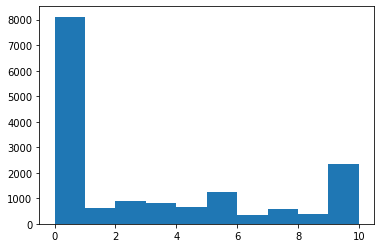

In [88]:
plt.hist(dataset['LOST_VACATION'])

In [89]:
dataset['PLACES_VISITED'].value_counts()

10    3558
5     1862
3     1840
2     1787
4     1503
1     1252
6     1136
0     1016
8      881
7      878
9      258
Name: PLACES_VISITED, dtype: int64

(array([1016., 1252., 1787., 1840., 1503., 1862., 1136.,  878.,  881.,
        3816.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

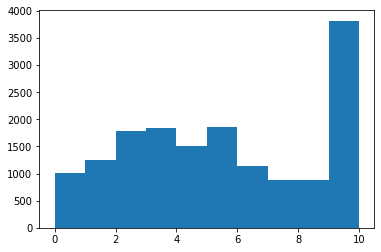

In [90]:
plt.hist(dataset['PLACES_VISITED'])

(array([9413.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6558.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

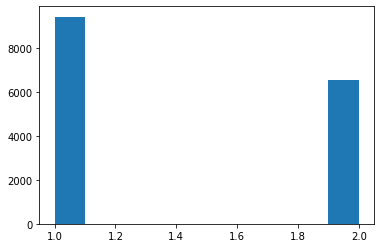

In [91]:
plt.hist(dataset['BMI_RANGE'])

In [92]:
dataset.drop('BMI_RANGE',axis = 1,inplace= True)

In [93]:
dataset

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,6,4,5,0,7,5,5,1,4,0,5,2,1,1.0
1,2,3,4,3,8,10,5,2,5,2,5,5,8,2,2,2,3,2,6,2,1,1.0
2,2,3,3,4,4,10,3,2,2,2,4,5,8,10,2,2,4,8,3,2,1,1.0
3,3,3,10,3,10,7,2,5,3,5,5,0,5,7,5,1,5,2,0,3,1,1.0
4,5,1,3,3,10,4,2,4,5,0,5,0,7,0,0,2,8,1,5,3,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,0,4,0,10,0,4,8,2,10,7,7,0,1,1,5,2,5,3,1,1.0
15968,3,3,6,8,7,4,6,3,7,5,6,5,6,0,0,2,10,5,8,1,1,3.0
15969,4,3,0,10,10,8,6,5,7,3,5,2,7,0,1,2,10,1,10,1,0,3.0
15970,1,1,10,8,2,7,3,2,6,10,1,5,8,7,2,2,1,6,8,1,1,2.0


<AxesSubplot:xlabel='SUFFICIENT_INCOME', ylabel='WORK_LIFE_BALANCE_SCORE'>

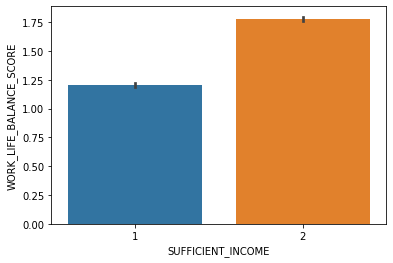

In [94]:
# no particular effect on work_life_balance. both not sufficient and sufficient lead to a good work life balance score
sns.barplot(x=dataset['SUFFICIENT_INCOME'], y=dataset['WORK_LIFE_BALANCE_SCORE'])

<AxesSubplot:xlabel='AGE', ylabel='WORK_LIFE_BALANCE_SCORE'>

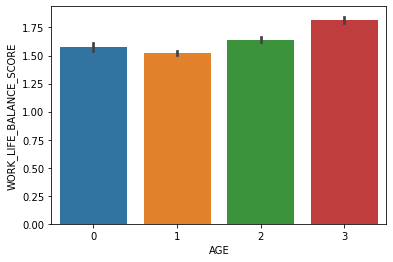

In [95]:
sns.barplot(x=dataset['AGE'], y=dataset['WORK_LIFE_BALANCE_SCORE'])

<AxesSubplot:xlabel='GENDER', ylabel='WORK_LIFE_BALANCE_SCORE'>

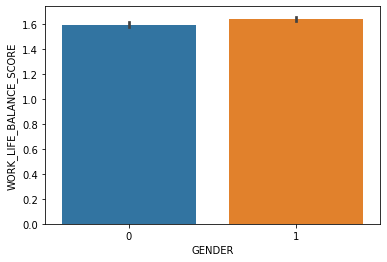

In [96]:
sns.barplot(x=dataset['GENDER'], y=dataset['WORK_LIFE_BALANCE_SCORE'])

# **Healthy Body**

Can a healthy body impact work life balance score? We have isolated the following attributes that we think might contribute to a healthy mind:
* 'FRUITS_VEGGIES'
* 'DAILY_STEPS'
* 'SLEEP_HOURS'

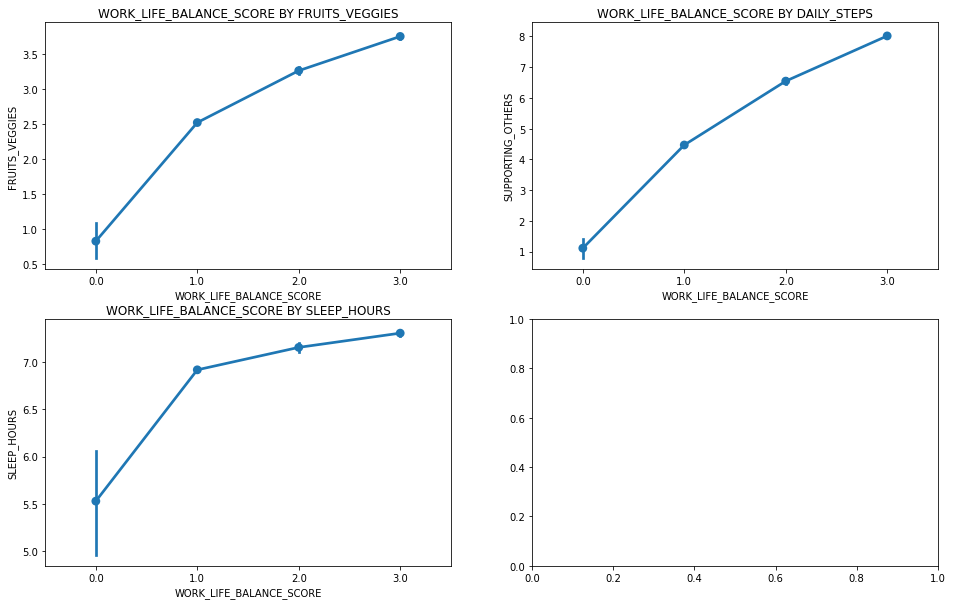

In [97]:
# plotting the attributes individually against work life balance score to see their individual impacts
f,ax = plt.subplots(2,2,figsize=(16,10))
ax[0,0].set_title('WORK_LIFE_BALANCE_SCORE BY FRUITS_VEGGIES')
ax[0,1].set_title('WORK_LIFE_BALANCE_SCORE BY DAILY_STEPS')
ax[1,0].set_title('WORK_LIFE_BALANCE_SCORE BY SLEEP_HOURS')

sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'FRUITS_VEGGIES',  data=dataset, ax = ax[0,0])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'SUPPORTING_OTHERS',  data=dataset, ax = ax[0,1])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'SLEEP_HOURS', data=dataset, ax = ax[1,0])



plt.show()

Healthy body seems to have a great impact on work life balance score

In [98]:
X = dataset[['FRUITS_VEGGIES', 'DAILY_STEPS', 'SLEEP_HOURS']]
y = dataset['WORK_LIFE_BALANCE_SCORE']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [100]:
# Logistic Regression
healthybody = LogisticRegression()
healthybody.fit(X_train, y_train)
y_pred = healthybody.predict(X_test)
HB=healthybody.score(X_train, y_train)*100
print('Train Score using Logistic Regression: ',HB)
print('Test Score using Logistic Regression: ',healthybody.score(X_test, y_test)*100)


# Decision Tree Classifier
healthybodytree = DecisionTreeClassifier(random_state=0)
healthybodytree.fit(X_train, y_train)
y_pred = healthybodytree.predict(X_test)
print('Score using Decision Tree: ',accuracy_score(y_test, y_pred)*100)

# Random Forest Classifier
healthybodyforest = RandomForestClassifier(random_state=0)
healthybodyforest.fit(X_train, y_train)
y_pred = healthybodyforest.predict(X_test)
print('Score using Random Forest Classifier: ',accuracy_score(y_test, y_pred)*100)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train Score using Logistic Regression:  65.3882279273638
Test Score using Logistic Regression:  64.4131455399061
Score using Decision Tree:  64.06885758998435
Score using Random Forest Classifier:  63.84976525821596


# **Healthy Mind**

Can a healthy mind impact work life balance score? We have isolated the following attributes that we think might contribute to a healthy mind:
* 'DAILY_STRESS'
* 'SLEEP_HOURS'
* 'DAILY_SHOUTING'
* 'WEEKLY_MEDITATION'
* 'FLOW'

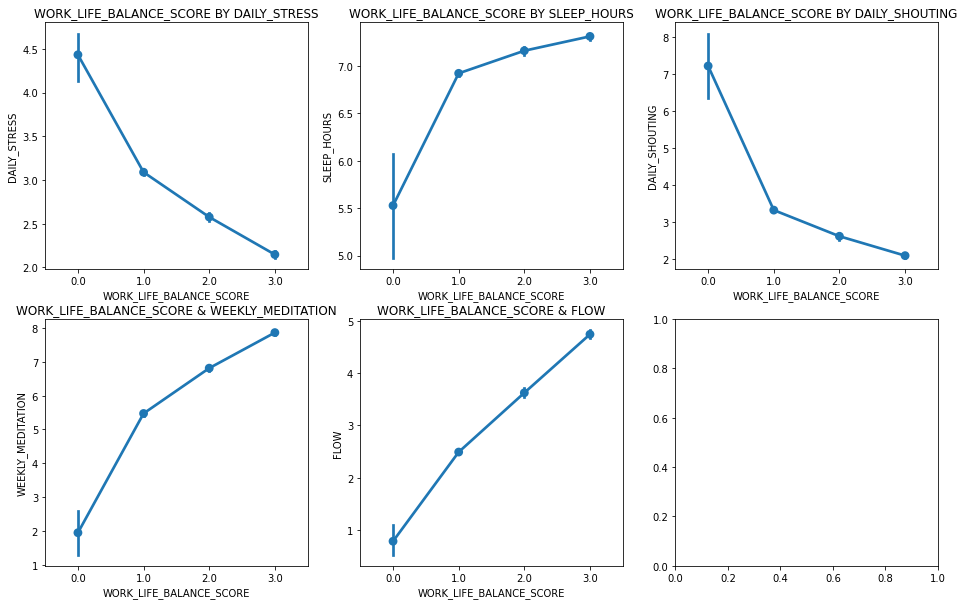

In [101]:
# plotting the attributes individually against work life balance score to see their individual impacts
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('WORK_LIFE_BALANCE_SCORE BY DAILY_STRESS')
ax[0,1].set_title('WORK_LIFE_BALANCE_SCORE BY SLEEP_HOURS')
ax[0,2].set_title('WORK_LIFE_BALANCE_SCORE BY DAILY_SHOUTING')
ax[1,0].set_title('WORK_LIFE_BALANCE_SCORE & WEEKLY_MEDITATION')
ax[1,1].set_title('WORK_LIFE_BALANCE_SCORE & FLOW')


sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'DAILY_STRESS',  data=dataset, ax = ax[0,0])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'SLEEP_HOURS',  data=dataset, ax = ax[0,1])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'DAILY_SHOUTING', data=dataset, ax = ax[0,2])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'WEEKLY_MEDITATION',  data=dataset, ax = ax[1,0])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'FLOW',  data=dataset, ax = ax[1,1])

plt.show()

- Clearly lower stress levels give a better work life balance score
- Similarly, less shouting which could be an indicator for anger levels give a better work life balance score
- Higher levels of meditation, sleep hours and flow give better work life balance score

In [102]:
# isolating the features from the dataset
X = dataset[['DAILY_STRESS', 'SLEEP_HOURS', 'DAILY_SHOUTING', 'WEEKLY_MEDITATION', 'FLOW']]
y = dataset['WORK_LIFE_BALANCE_SCORE']

In [103]:
# splitting into train and test sets for better evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [104]:
# Logistic Regression
healthymind = LogisticRegression()
healthymind.fit(X_train, y_train)
y_pred = healthymind.predict(X_test)
HM=healthymind.score(X_train, y_train)*100
print('Train Score using Logistic Regression: ',HM)
print('Test Score using Logistic Regression: ',healthymind.score(X_test, y_test)*100)


# Decision Tree Classifier
healthymindtree = DecisionTreeClassifier(random_state=0)
healthymindtree.fit(X_train, y_train)
y_pred = healthymindtree.predict(X_test)
print('Score using Decision Tree: ',accuracy_score(y_test, y_pred)*100)


# Random Forest Classifier
healthymindforest = RandomForestClassifier(random_state=0)
healthymindforest.fit(X_train, y_train)
y_pred = healthymindforest.predict(X_test)
print('Score using random Forest Classifier: ',accuracy_score(y_test, y_pred)*100)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train Score using Logistic Regression:  67.85378835316219
Test Score using Logistic Regression:  67.04225352112675
Score using Decision Tree:  58.9358372456964
Score using random Forest Classifier:  62.190923317683875


Logistic Regression gave the best score hence we will move forward with this model for prediction.

# **Expertise**

Can expertise impact work life balance score? We have isolated the following attributes that we think might contribute to a healthy mind:
* 'ACHIEVEMENT'
* 'TODO_COMPLETED'
* 'SUFFICIENT_INCOME'
* 'PERSONAL_AWARDS'

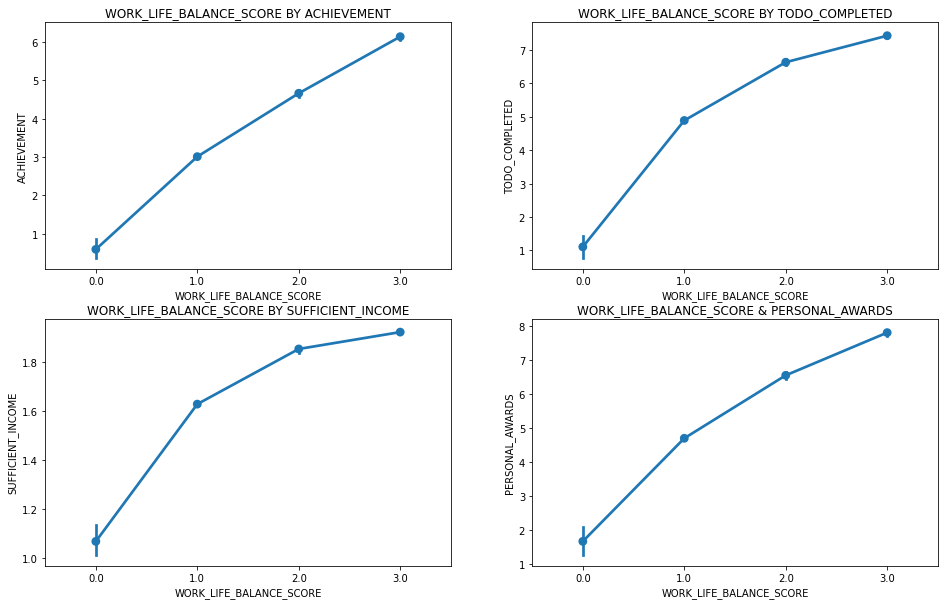

In [105]:
# plotting the attributes individually against work life balance score to see their individual impacts
f,ax = plt.subplots(2,2,figsize=(16,10))
ax[0,0].set_title('WORK_LIFE_BALANCE_SCORE BY ACHIEVEMENT')
ax[0,1].set_title('WORK_LIFE_BALANCE_SCORE BY TODO_COMPLETED')
ax[1,0].set_title('WORK_LIFE_BALANCE_SCORE BY SUFFICIENT_INCOME')
ax[1,1].set_title('WORK_LIFE_BALANCE_SCORE & PERSONAL_AWARDS')



sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'ACHIEVEMENT',  data=dataset, ax = ax[0,0])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'TODO_COMPLETED',  data=dataset, ax = ax[0,1])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'SUFFICIENT_INCOME', data=dataset, ax = ax[1,0])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'PERSONAL_AWARDS',  data=dataset, ax = ax[1,1])


plt.show()

Better expertise seems to have a good impact on work life balance.

In [106]:
X = dataset[['ACHIEVEMENT', 'TODO_COMPLETED', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS']]
y = dataset['WORK_LIFE_BALANCE_SCORE']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [108]:
# Logistic Regression
expertise = LogisticRegression()
expertise.fit(X_train, y_train)
y_pred = expertise.predict(X_test)
EX=expertise.score(X_train, y_train)*100
print('Train Score using Logistic Regression: ',EX)
print('Test Score using Logistic Regression: ',expertise.score(X_test, y_test)*100)


# Decision Tree Classifier
expertisetree = DecisionTreeClassifier(random_state=0)
expertisetree.fit(X_train, y_train)
y_pred = expertisetree.predict(X_test)
print('Score using Decision Tree: ',accuracy_score(y_test, y_pred)*100)


# Random Forest Classifier
expertiseforest = RandomForestClassifier(random_state=0)
expertiseforest.fit(X_train, y_train)
y_pred = expertiseforest.predict(X_test)
print('Score using random Forest Classifier: ',accuracy_score(y_test, y_pred)*100)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train Score using Logistic Regression:  71.38384470882906
Test Score using Logistic Regression:  70.51643192488262
Score using Decision Tree:  68.51330203442879
Score using random Forest Classifier:  67.94992175273865


Logistic Regression gave the best score hence we will move forward with this model for prediction.

# **Connection**

Can connection impact work life balance score? We have isolated the following attributes that we think might contribute to a healthy mind:
* 'CORE_CIRCLE'
* 'SUPPORTING_OTHERS'
* 'SOCIAL_NETWORK'

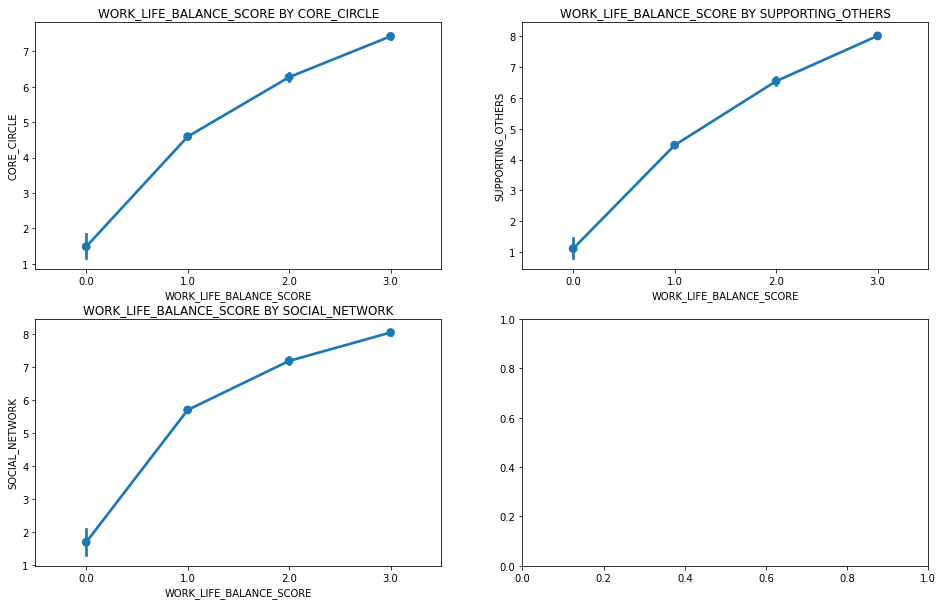

In [109]:
# plotting the attributes individually against work life balance score to see their individual impacts
f,ax = plt.subplots(2,2,figsize=(16,10))
ax[0,0].set_title('WORK_LIFE_BALANCE_SCORE BY CORE_CIRCLE')
ax[0,1].set_title('WORK_LIFE_BALANCE_SCORE BY SUPPORTING_OTHERS')
ax[1,0].set_title('WORK_LIFE_BALANCE_SCORE BY SOCIAL_NETWORK')




sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'CORE_CIRCLE',  data=dataset, ax = ax[0,0])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'SUPPORTING_OTHERS',  data=dataset, ax = ax[0,1])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'SOCIAL_NETWORK', data=dataset, ax = ax[1,0])



plt.show()

Better social life seems to have a good impact on work life balance.

In [110]:
X = dataset[['CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK']]
y = dataset['WORK_LIFE_BALANCE_SCORE']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [112]:
# Logistic Regression
connection = LogisticRegression()
connection.fit(X_train, y_train)
y_pred = connection.predict(X_test)
CO=connection.score(X_train, y_train)*100
print('Train Score using Logistic Regression: ',CO)
print('Test Score using Logistic Regression: ',connection.score(X_test, y_test)*100)


# Decision Tree Classifier
connectiontree = DecisionTreeClassifier(random_state=0)
connectiontree.fit(X_train, y_train)
y_pred = connectiontree.predict(X_test)
print('Score using Decision Tree: ',accuracy_score(y_test, y_pred)*100)


# Random Forest Classifier
connectionforest = RandomForestClassifier(random_state=0)
connectionforest.fit(X_train, y_train)
y_pred = connectionforest.predict(X_test)
print('Score using random Forest Classifier: ',accuracy_score(y_test, y_pred)*100)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train Score using Logistic Regression:  69.05917345021916
Test Score using Logistic Regression:  67.19874804381847
Score using Decision Tree:  67.19874804381847
Score using random Forest Classifier:  66.97965571205008


Logistic Regression gave the best score hence we will move forward with this model for prediction.

# **Meaning**

Can meaning impact work life balance score? We have isolated the following attributes that we think might contribute to a healthy mind:
* 'LIVE_VISION'
* 'TIME_FOR_PASSION'


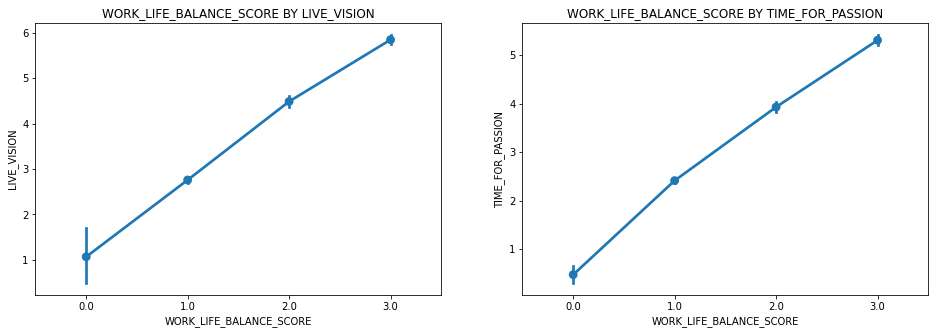

In [113]:
# plotting the attributes individually against work life balance score to see their individual impacts
f,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].set_title('WORK_LIFE_BALANCE_SCORE BY LIVE_VISION')
ax[1].set_title('WORK_LIFE_BALANCE_SCORE BY TIME_FOR_PASSION')

sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'LIVE_VISION',  data=dataset, ax = ax[0])
sns.pointplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'TIME_FOR_PASSION',  data=dataset, ax = ax[1])

plt.show()

In [114]:
X = dataset[['LIVE_VISION', 'TIME_FOR_PASSION']]
y = dataset['WORK_LIFE_BALANCE_SCORE']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [116]:
# Logistic Regression
meaning = LogisticRegression()
meaning.fit(X_train, y_train)
y_pred = meaning.predict(X_test)
ME=meaning.score(X_train, y_train)*100
print('Train Score using Logistic Regression: ',ME)
print('Test Score using Logistic Regression: ',meaning.score(X_test, y_test)*100)


# Decision Tree Classifier
meaningtree = DecisionTreeClassifier(random_state=0)
meaningtree.fit(X_train, y_train)
y_pred = meaningtree.predict(X_test)
print('Score using Decision Tree: ',accuracy_score(y_test, y_pred)*100)


# Random Forest Classifier
meaningforest = RandomForestClassifier(random_state=0)
meaningforest.fit(X_train, y_train)
y_pred = meaningforest.predict(X_test)
print('Score using random Forest Classifier: ',accuracy_score(y_test, y_pred)*100)

Train Score using Logistic Regression:  67.13368816530996
Test Score using Logistic Regression:  67.0735524256651
Score using Decision Tree:  66.57276995305165
Score using random Forest Classifier:  66.7605633802817


# **Complete Model**

In [117]:
X = dataset.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
y = dataset['WORK_LIFE_BALANCE_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [118]:
# Logistic Regression
hlthylife = LogisticRegression()
hlthylife.fit(X_train, y_train)
y_pred = hlthylife.predict(X_test)
HL=hlthylife.score(X_train, y_train)*100
print('Train Score using Logistic Regression: ',HL)
print('Test Score using Logistic Regression: ',hlthylife.score(X_test, y_test)*100)


Train Score using Logistic Regression:  87.05385097056983
Test Score using Logistic Regression:  85.94679186228483


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [119]:
# Decision Tree Classifier
hlthylifetree = DecisionTreeClassifier(random_state=0)
hlthylifetree.fit(X_train, y_train)
y_pred =hlthylifetree.predict(X_test)
print('Score using Decision Tree: ',accuracy_score(y_test, y_pred)*100)

Score using Decision Tree:  72.7073552425665


In [120]:
# Random Forest Classifier
hlthylifeforest = RandomForestClassifier(random_state=0)
hlthylifeforest.fit(X_train, y_train)
y_pred = hlthylifeforest.predict(X_test)
print('Score using random Forest Classifier: ',accuracy_score(y_test, y_pred)*100)

Score using random Forest Classifier:  83.59937402190923


<function matplotlib.pyplot.show(close=None, block=None)>

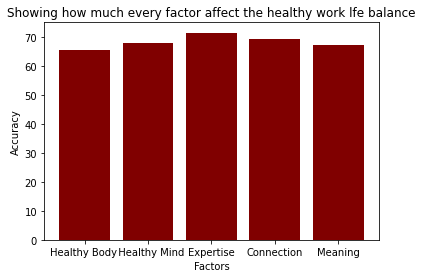

In [132]:
models=[HB,HM,EX,CO,ME]
name=['Healthy Body ','  Healthy Mind','Expertise','Connection','Meaning']
plt.bar(name,models,color='maroon')
plt.xlabel("Factors")
plt.ylabel("Accuracy")
plt.title("Showing how much every factor affect the healthy work life balance")
plt.show

In [ ]:
# loading the model
pickle.dump(hlthylife, open('hlthylife.pkl', 'wb'))

In [ ]:
# Loading model to compare the results
model = pickle.load(open('hlthylife.pkl','rb'))

In [ ]:
final_features=[5,4,0,2,10,10,5,1,74	1	5	8	5	2	2	1	8	4	1	1	]
prediction = hlthylife.predict([final_features])
output = round(prediction[0])
print(output)
